# Base LogisticRegression
In this notebook, the implementation of Logistic Regression will be disassembled and compared with the implementation of sklearn. <br>

The model takes a feature vector <font size="3"> $\vec{x} = (1, x_1, x_2, ..., x_n)$ </font>, each class has its own weights <font size="3"> $\vec{w}$</font>.<br>
We get the scalar product between the vector of weights and the vector of features as in linear regression: <font size="3"> $$\sum_1^n w_ix_i$$ </font>

The result of the scalar product is substituted into the sigmoid function: <br>
<p style="text-align: center;"><font size="3"> $$\hat{f}(x) = \sigma(wx) = {1\over 1 + e^{-wx}}$$ </font></p>

Based on the likelihood function for training any model, where <font size="3"> $X$ </font> is a feature vector, <font size="3"> $\hat{f}(x)$ </font> is our model, we can construct a loss function:
<p style="text-align: center;"><font size="3"> $$P(Y = 1|X) = \hat{f}(x)$$ </font></p>
Let's call it plausibility:
<p style="text-align: center;"><font size="3"> $$\prod_1^n P(Y = y_i|x_i)$$ </font></p>
A theorem from statistics guarantees that if we find model parameters that maximize likelihood, then they will be good: <br>
<p style="text-align: center;"><font size="3"> $$\prod_1^n P(Y = y_i|x_i) → max$$</font></p>
<p style="text-align: center;"><font size="3"> $$\ln(\prod_1^n P(Y = y_i|x_i)) → max$$</font></p>
Let's transform the maximization problem into the minimization problem:
<p style="text-align: center;"><font size="3"> $$L(w) = -\ln(\prod_1^n P(Y = y_i|x_i)) → min$$ </font></p>
Let's assume that our model predicts probabilities:
<p style="text-align: center;"><font size="3"> $$\ln(P(Y = y_i|x_i)) = y_i\ln(\hat{f}(x_i)) + (1 - y_i)\ln(1 - \hat{f}(x_i))$$ </font></p>
The probability predicted by logistic regression can be substituted into the previously obtained loss function:
<p style="text-align: center;"><font size="3"> $$L(w) = -\sum_1^ny_i\ln(\hat{f}(x_i)) + (1 - y_i)\ln(1 - \hat{f}(x_i))$$ </font></p>

### Load libraries and packages

In [1]:
import warnings
import gc
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from models.linear import LogisticRegression as MyLogisticRegression
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Create Train and Test Data
First let's look at the data:

(1200, 2) (300, 2)


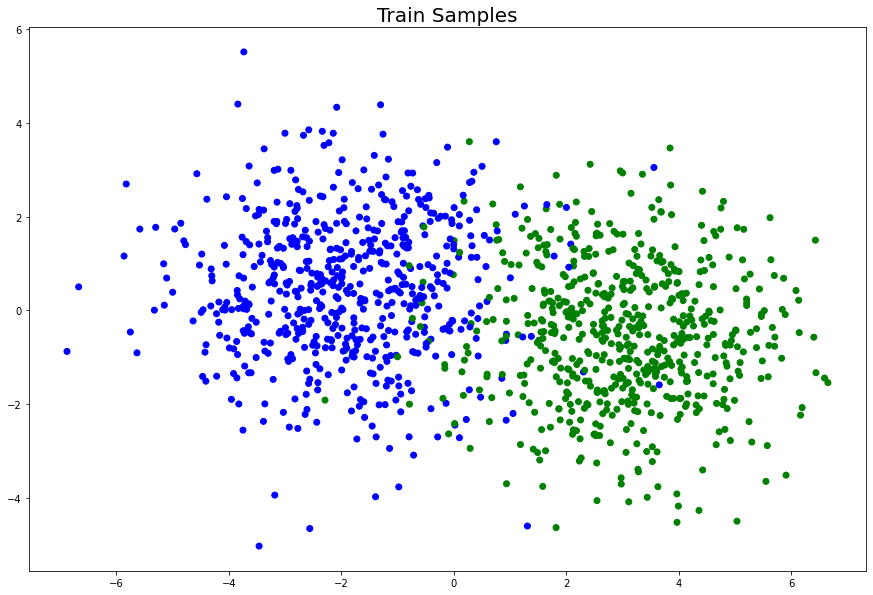

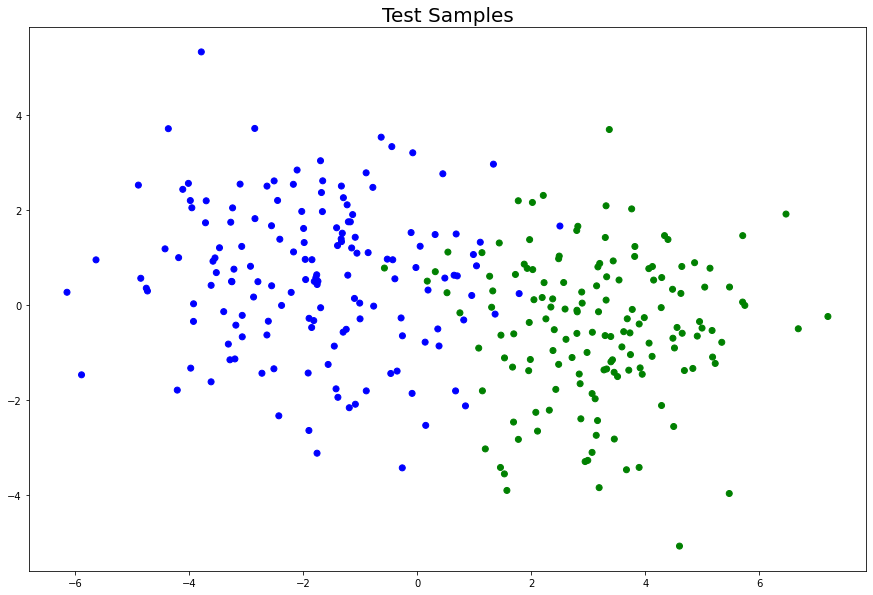

In [15]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=1500, 
                  centers=[[-2,0.5],[3,-0.5]], 
                  cluster_std=1.5, 
                  random_state=17)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=17)

colors = ("blue", "green")
colored_y_train = np.zeros(y_train.size, dtype=str)
colored_y_holdout = np.zeros(y_holdout.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y_train[y_train.ravel() == cl] = str(colors[i])
    colored_y_holdout[y_holdout.ravel() == cl] = str(colors[i])
    
print(X_train.shape, X_holdout.shape)

plt.figure(figsize=(15, 10))
plt.title("Train Samples", size=20)
plt.scatter(X_train[:, 0], X_train[:, 1], c=colored_y_train)
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Test Samples", size=20)
plt.scatter(X_holdout[:, 0], X_holdout[:, 1], c=colored_y_holdout)
plt.show()

### Create models

In [5]:
clf = MyLogisticRegression.LogisticRegression()
clf.fit(X, y, epochs=1000, batch_size=150)
w = clf.get_weights()

(200, 200)


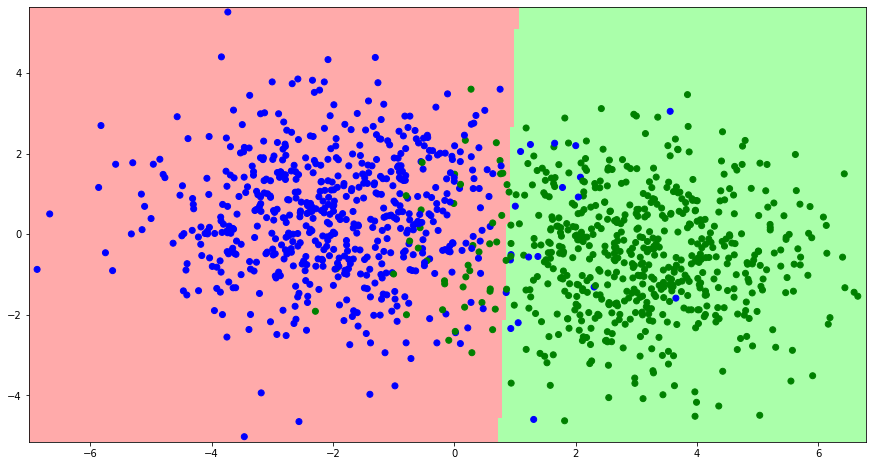

In [16]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_train[:,0]) - eps, np.max(X_train[:,0]) + eps, 200),
                     np.linspace(np.min(X_train[:,1]) - eps, np.max(X_train[:,1]) + eps, 200))
print(xx.shape)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[:, 0], X_train[:, 1], c=colored_y_train);

(200, 200)


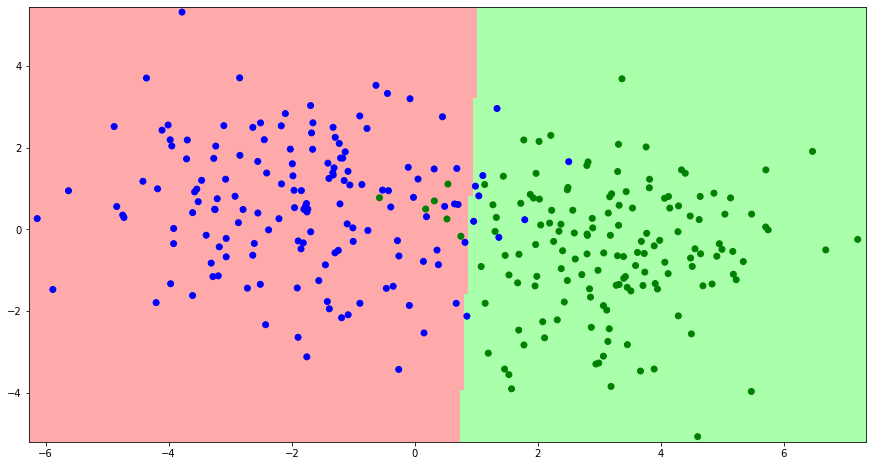

In [18]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_holdout[:,0]) - eps, np.max(X_holdout[:,0]) + eps, 200),
                     np.linspace(np.min(X_holdout[:,1]) - eps, np.max(X_holdout[:,1]) + eps, 200))
print(xx.shape)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_holdout[:, 0], X_holdout[:, 1], c=colored_y_holdout);